In [2]:
import skimage as ski
import numpy as np 

image = ski.io.imread('Image1.png')

print(image.shape)

(512, 512, 3)


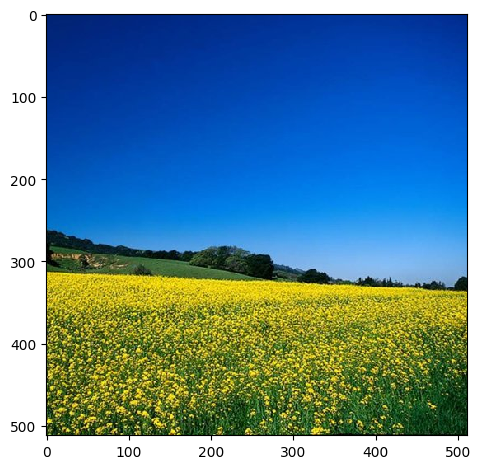

In [3]:
ski.io.imshow(image)

In [4]:
image[100,100,0]

1

# Nearest Neighbors

In [5]:
matrix = np.arange(100).reshape(10,10)
matrix

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [6]:
x, y = 5, 5
matrix[x,y]

55

4 Neighbors

In [7]:
N1 = matrix[ x-1, y]
N2 = matrix[ x+1, y]
N3 = matrix[ x, y-1]
N4 = matrix[ x, y+1]

print(f"{N1}, {N2}, {N3}, {N4}")

45, 65, 54, 56


# Resize

(512, 512, 3)

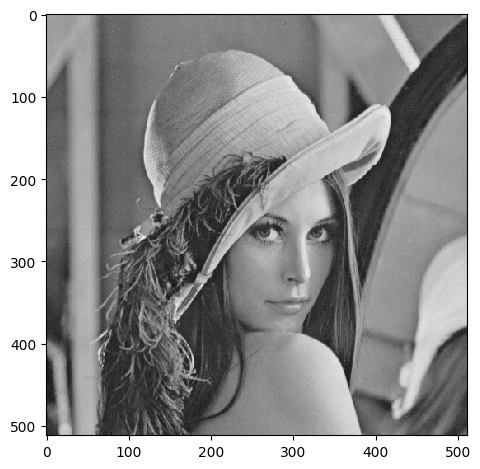

In [8]:
grayimage= ski.io.imread("kP0u2.png")
ski.io.imshow(grayimage)
grayimage.shape

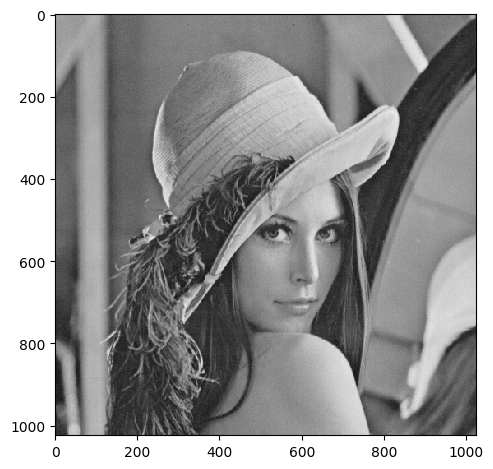

In [9]:
resizedImage = ski.transform.resize(grayimage, (1024,1024), order=0, anti_aliasing=False)
ski.io.imshow(resizedImage)

# Tresholding

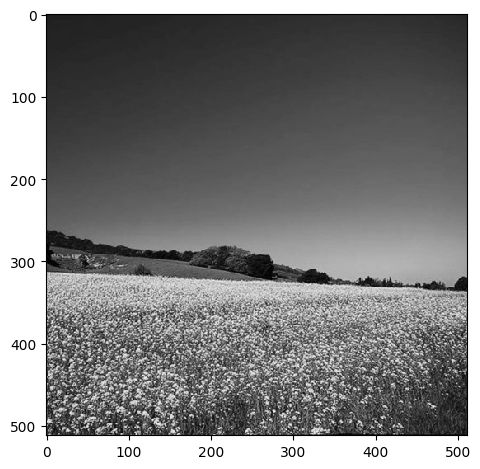

In [51]:
tresholdImage = image.copy()
thresholdImage = ski.color.rgb2gray(tresholdImage)
ski.io.imshow(thresholdImage)

In [52]:
thresholdImage[thresholdImage < 0.5] = 0

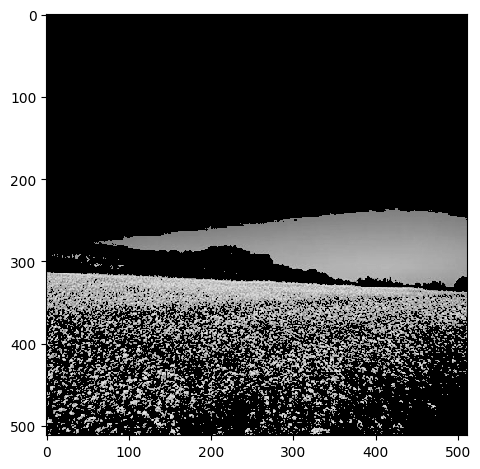

In [53]:
ski.io.imshow(thresholdImage)

# Masking

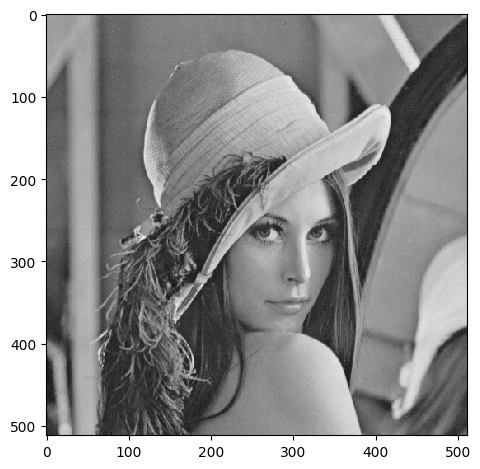

In [11]:
ski.io.imshow(grayimage)

In [12]:
grayimage.shape

(512, 512, 3)

In [13]:
x, y, z = grayimage.shape

mask = np.zeros((x,y,z), dtype=np.uint8)
mask2 = np.zeros((x,y,z), dtype=np.uint8)

In [14]:
mask[200:300, 200:300] = 1
mask2[250:350, 250:350] = 1

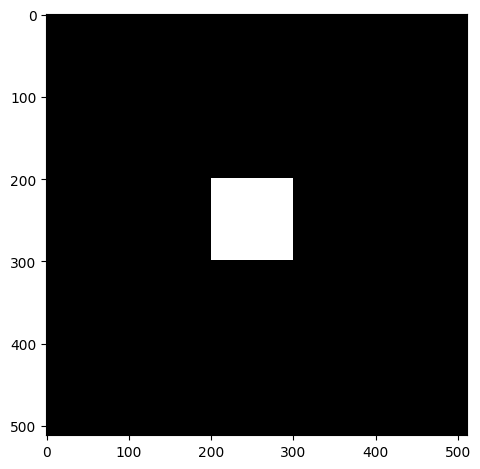

In [15]:
ski.io.imshow(mask*255)

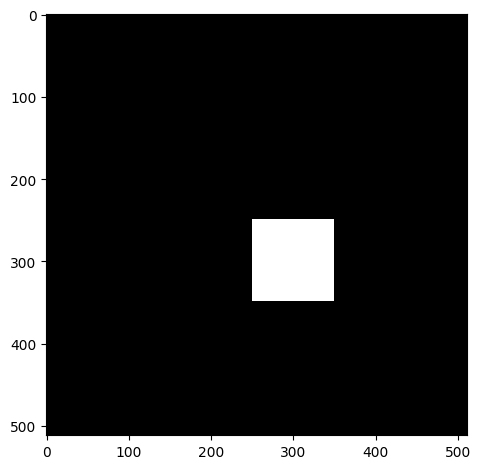

In [16]:
ski.io.imshow(mask2*255)

In [17]:
newImage = grayimage * mask
newImage2 = grayimage * mask2


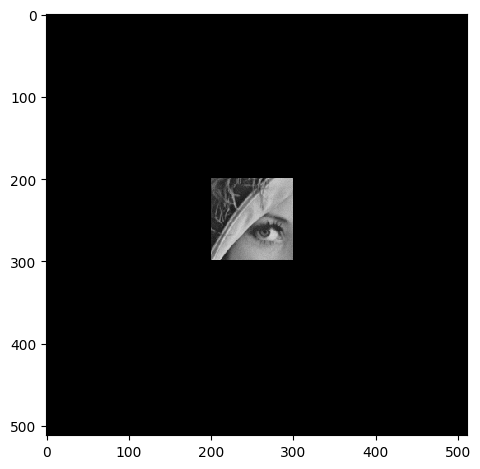

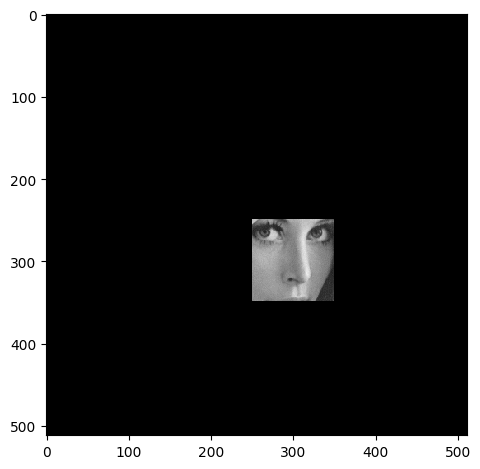

In [18]:
ski.io.imshow(newImage)
ski.io.show()
ski.io.imshow(newImage2)

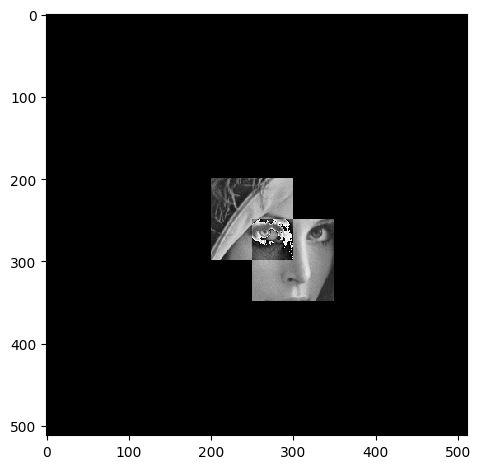

In [19]:
# Output is corrupted. it doesn't give the desire output
combined_image = newImage + newImage2
ski.io.imshow(combined_image)

# Logical Operations between multiple masks

## Or

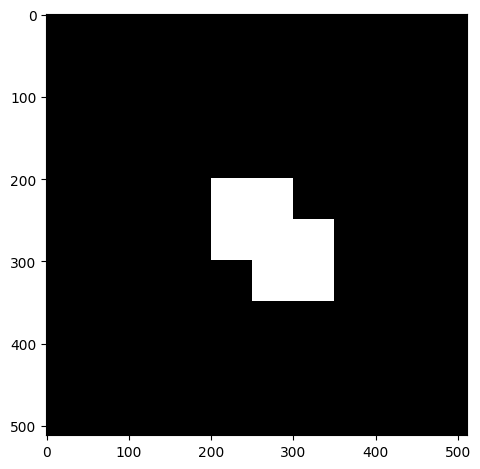

In [20]:
maskOr = mask | mask2 
ski.io.imshow(maskOr * 255)

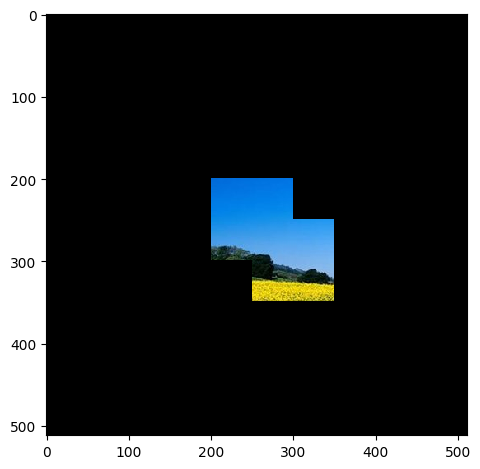

In [21]:
orImage = image * maskOr
ski.io.imshow(orImage)

## And

c:\Users\baher\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


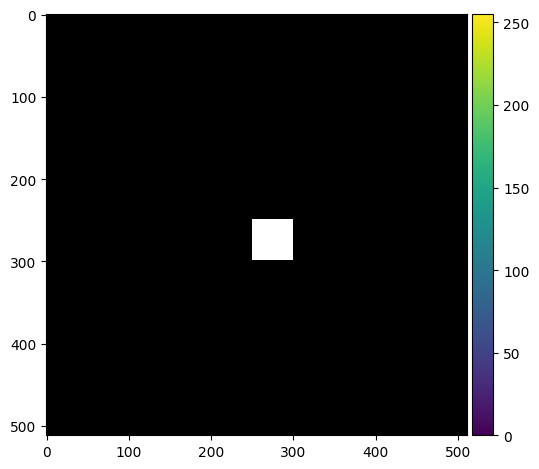

In [22]:
maskAnd = mask & mask2
ski.io.imshow(maskAnd * 255)

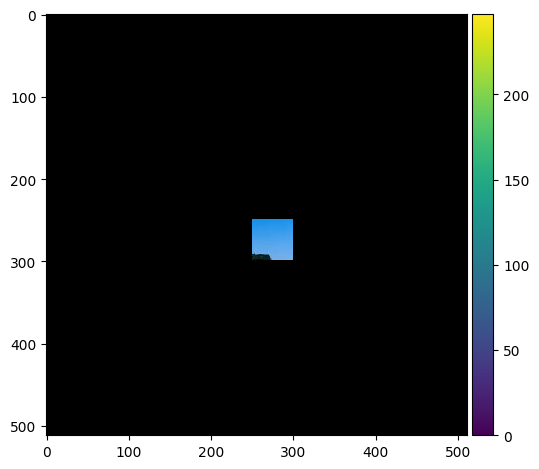

In [23]:
andImage = image * maskAnd 
ski.io.imshow(andImage)

## And not

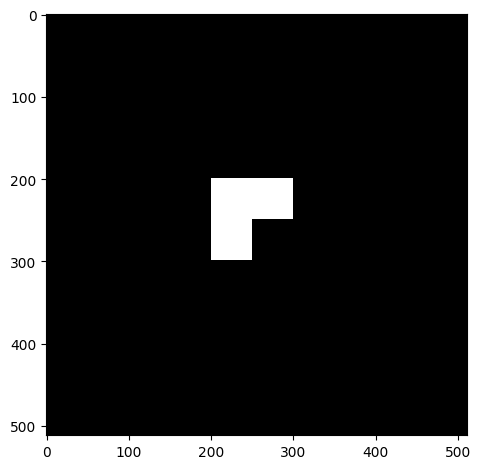

In [24]:
mask_andNot = mask & ~(mask2)
ski.io.imshow(mask_andNot * 255)

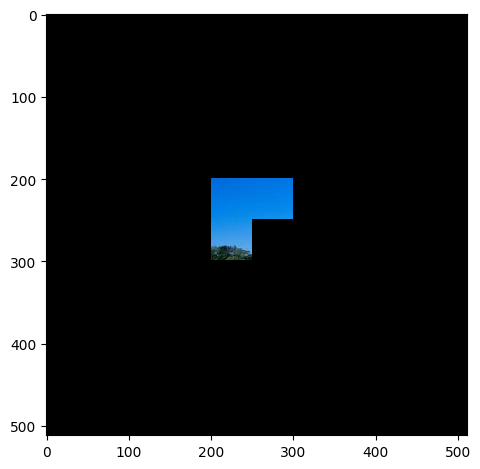

In [25]:
andNotImage = image * mask_andNot
ski.io.imshow(andNotImage) 

## XOR

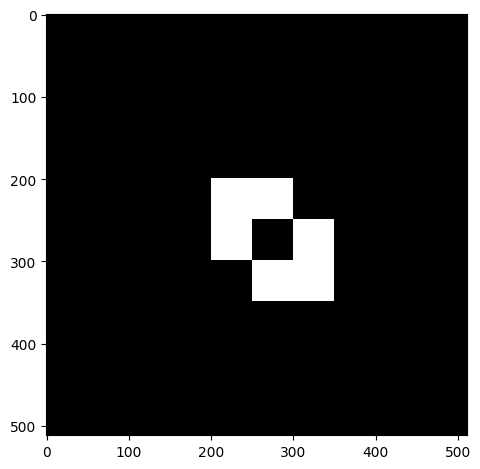

In [26]:
maskXOR = (mask | mask2) & ~(mask & mask2)
ski.io.imshow(maskXOR * 255)

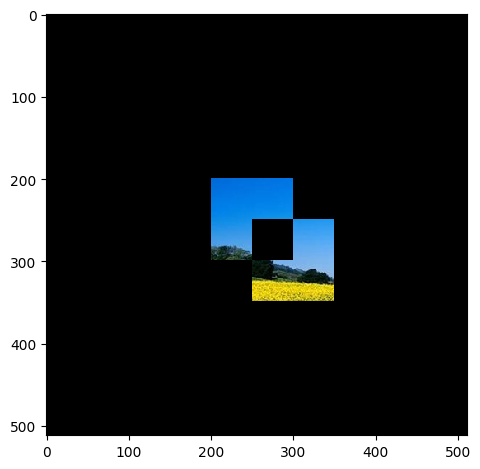

In [27]:
XorImage = image * maskXOR 
ski.io.imshow(XorImage)

# Color formate Converter

In [28]:
import matplotlib.colors

rgb_color = (150, 200,130)  
rgb_numpy = np.array(rgb_color) / 255            # Normalize color to range [0,1]

## RGB to HEX

In [29]:
hex_color = matplotlib.colors.to_hex(rgb_numpy)
hex_color

'#96c882'

## HEX to RGB

In [30]:
hex_to_rgb = matplotlib.colors.to_rgb(hex_color)
np.array(hex_to_rgb) * 255

array([150., 200., 130.])

## RGB to HSV

In [31]:
hsv_color = matplotlib.colors.rgb_to_hsv(rgb_color)
hsv_color

array([  0.28571429,   0.35      , 200.        ])

## HSV to RGb

In [32]:
hsv_to_rgb = matplotlib.colors.hsv_to_rgb(hsv_color)
hsv_to_rgb

array([150., 200., 130.])